### Importamos las librerías necesarias

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skewnorm

### Creamos un dataframe

In [2]:
data = pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9,10],
                     'y':[1.2,2.4,3,3.9,5.6,6,7.1,7.8,9,10.2]})
data.head()

,x,y
0,1,1.2
1,2,2.4
2,3,3.0
3,4,3.9
4,5,5.6


### Ajustamos una regresión lineal

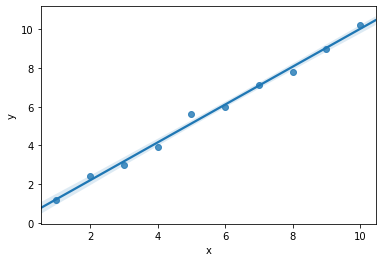

In [3]:
sns.regplot(data['x'],data['y'])

### Agregamos dos outliers para ver cómo éstos afectan al regresor lineal

In [4]:
data = pd.DataFrame({'x':[1,2,3,4,5,6,7,7,8,8,9,10],
                     'y':[1.2,2.4,3,3.9,5.6,6,7.1,25,22,7.8,9,10.2]})
data.head()

,x,y
0,1,1.2
1,2,2.4
2,3,3.0
3,4,3.9
4,5,5.6


### Ajustamos nuevamente una regresión lineal

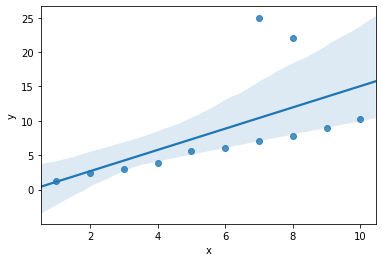

In [5]:
sns.regplot(data['x'],data['y'])

Como podemos observar, la distribución se ve fuertemente afectada por los outliers.

### Distribución normal
1. Creamos una distribucion normal con media 0 y desviación estándar de 1
2. Graficamos un histograma (azul) de los puntos que creamos en el paso anterior.
3. Ajustamos la línea de mejor ajuste (rojo) a nuestros datos

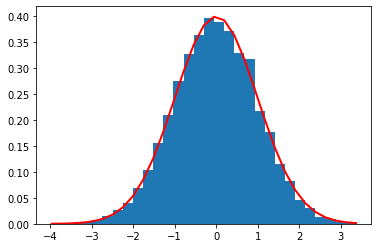

In [3]:
fig, ax = plt.subplots(1, 1)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

### Creamos un boxplot para ver si existen outliers

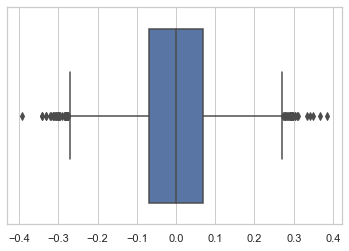

In [7]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(s)

### Distribución con sesgo positivo
1. Creamos un conjunto de puntos acorde a una distribución con sesgo positivo
2. Graficamos los puntos (rojo)

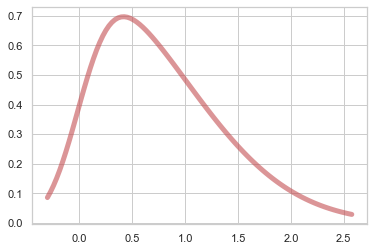

In [8]:
fig, ax = plt.subplots(1, 1)
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x,skewnorm.pdf(x,a),'r-', lw=5, alpha=0.6, label='skewnorm pdf')

### Creamos un boxplot para ver si existen outliers

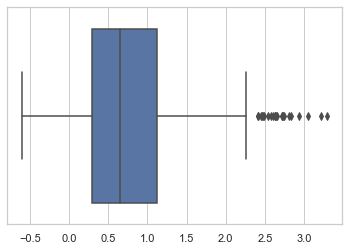

In [11]:
r = skewnorm.rvs(a, size=1000)
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(r)